In [24]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import src.feature as f
import time

In [25]:
template_origin=Image.open('./data/hand/template1.png')
template=[]

make_template_start=time.time()
for angle in range(0,360,2):
    _template_rotated=np.array(template_origin.rotate(angle))
    _template_feature_full=f.extract_template_feature(_template_rotated)
    template.append(f.make_one_template(_template_feature_full))
make_template_end=time.time()
print("make template time:",make_template_end-make_template_start)


make template time: 1.347226858139038


In [26]:
image=cv2.imread("./data/hand/all.jpg")
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

extract_feature_start=time.time()
image_feature=f.extract_image_feature(image)
response_map=f.compute_response_map(image_feature)
extract_feature_end=time.time()
print("extract feature time:",extract_feature_end-extract_feature_start)

match_start=time.time()
similarity=np.empty((len(template),response_map.shape[1]))
for i,(template_feature,offset,response_index) in enumerate(template):
    similarity[i,:]=f.compute_feature_similarity(response_map,template_feature,offset,response_index)
(xs,ys),angle_id=f.decode_match_location(similarity,0.85)
match_end=time.time()
print("match time:",match_end-match_start)
print(xs,ys,angle_id*2,sep='\n')

extract feature time: 0.04408550262451172
match time: 0.10304093360900879
[ 80  80  80  80  80  80 328 328 328 176 176 176 232 232 448 456 456 456
 456 288 296 456 288 296 288 296 288 296 288 296 288 296 288 296 288 296
 296 296  80  80  80  80  80  80]
[ 96  96  96  96  88  88 200 200 192 184 184 184 336 336 296 296 296 296
 296  56  56 296  56  56  56  56  56  56  56  56  56  56  56  56  56  56
  56  56  96  96  96  96  96  96]
[  0   2   4   6   8  10  44  46  56 126 128 130 190 194 244 246 250 256
 258 260 260 260 262 262 264 264 266 266 268 268 270 270 272 272 274 274
 276 278 348 350 352 354 356 358]


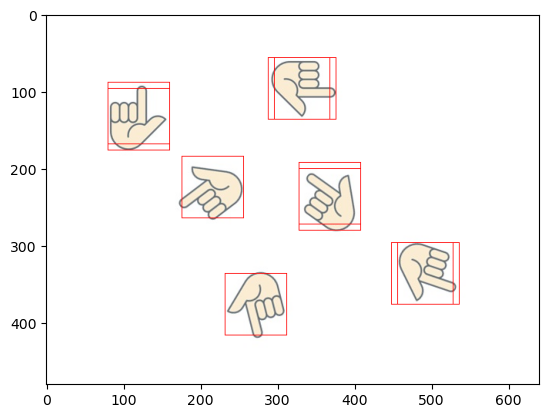

In [27]:
imshowd=image.copy()
for x,y in zip(xs,ys):
    cv2.rectangle(imshowd,(x,y),(x+80,y+80),(255,0,0),1)
plt.imshow(imshowd)